In [1]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

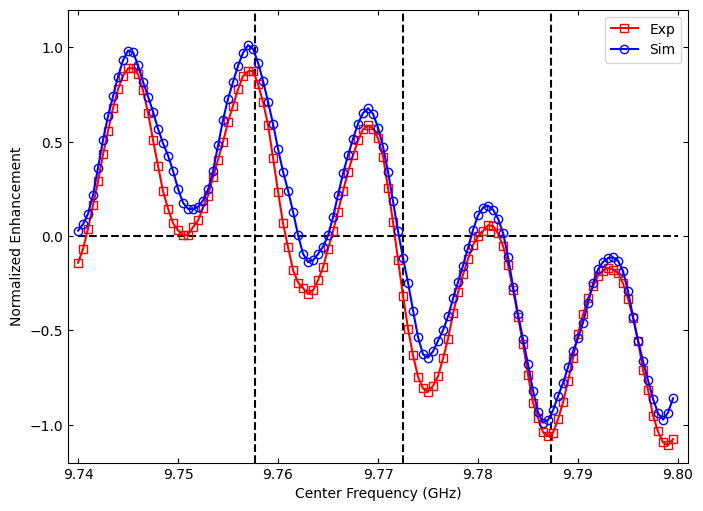

In [5]:
freq0 = 9.7725
freq_delta = 0.014836

results_dir = 'outputs'
param_dir = 'inputs'

def plot_data(ax, filename, results_dir, param_dir, color='b', marker='o', linestyle='solid'):
    param_name = os.path.splitext(filename)[0] + '.json'
    param_path = os.path.join(param_dir, param_name)
    filepath = os.path.join(results_dir, filename)
    df = pd.read_csv(filepath, skiprows=1, header=None)
    factor = 0.5 * (np.abs(df[1].min()) + df[1].max())
    ax.plot(df[0]/1e9, df[1]/factor,
            linestyle=linestyle, color=color, marker=marker, markerfacecolor='none',
            label='Sim')

fig = plt.figure(figsize=(8, 6), dpi=100)
ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1)
plt.hlines(0, 9.74, 9.80, linestyle='dashed', color='k')
plt.vlines(freq0, -1.2, 1.2, linestyle='dashed', color='k')
plt.vlines(freq0-freq_delta, -1.2, 1.2, linestyle='dashed', color='k')
plt.vlines(freq0+freq_delta, -1.2, 1.2, linestyle='dashed', color='k')

filepath = 'top_dnp_xband_experimental.csv'
df = pd.read_csv(filepath, delimiter=',', header=None)
df.head()
factor = 0.5 * (np.abs(df[1].min()) + df[1].max())
ax1.plot(df[0], -df[1]/factor, 'rs-', markerfacecolor='none', label='Exp')

filename='top_dnp_p41_zcw55_g10.result'
plot_data(ax1, filename, results_dir, param_dir, 'b', 'o')

ax1.set_xlabel('Center Frequency (GHz)')
ax1.set_ylabel('Normalized Enhancement')
ax1.tick_params(
    direction='in',
    bottom=True,
    top=True,
    left=True,
    right=True
)
ax1.set_xlim(9.739, 9.801)
ax1.set_ylim(-1.2, 1.2)
plt.legend()
# plt.savefig('dnpsoup_topdnp_exp_vs_sim_v1.ps')
plt.show()